In [9]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
#import corner
import pandas as pd

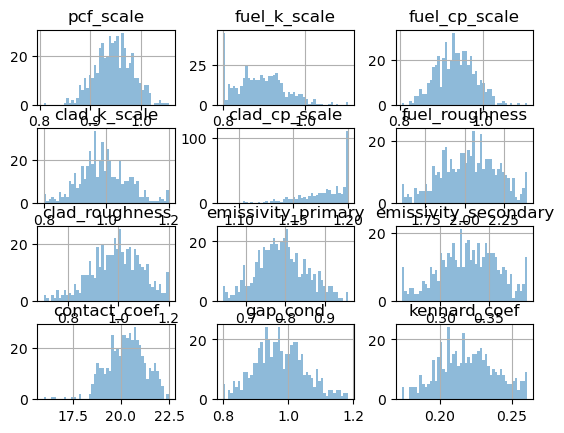

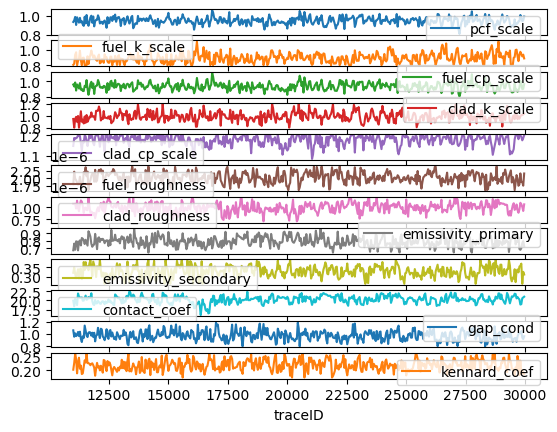

In [10]:
fname = 'dumpExport.csv'
### thining of the chain
interval = 40
### load data
df = pd.read_csv(fname, index_col='traceID')
index = df.index
x = range(index[10000], index[-1], interval)
df = df.loc[x]
### Histgram plot
df.hist(alpha=0.5, bins=50)
### trace plot
df.plot(subplots=True)
calibrated_mean = df.mean()

In [11]:
def plot_data(x, y1, mean, y2, param):
    fig,ax = plt.subplots(figsize=(13,7),constrained_layout=True)
    ax.hist(y2, bins=50, ec="yellow", fc="green", label='Calibrated', density=True)
    sns.kdeplot(y2, ax=ax, fill=True, alpha=0.5, linewidth=0)
    ax.axvline(x=np.mean(y2), color='b', label=f'Calibrated mean: {round(np.mean(y2), 4)}')
    ax.plot(x, y1,'r',label='Prior')
    ax.axvline(x=mean, color='r', label=f'Prior mean: {mean}')
    
    # ax.set_xlabel('Time [s]')
    ax.set_ylabel(param)
    fig.suptitle(param+' distribution')
    ax.legend()

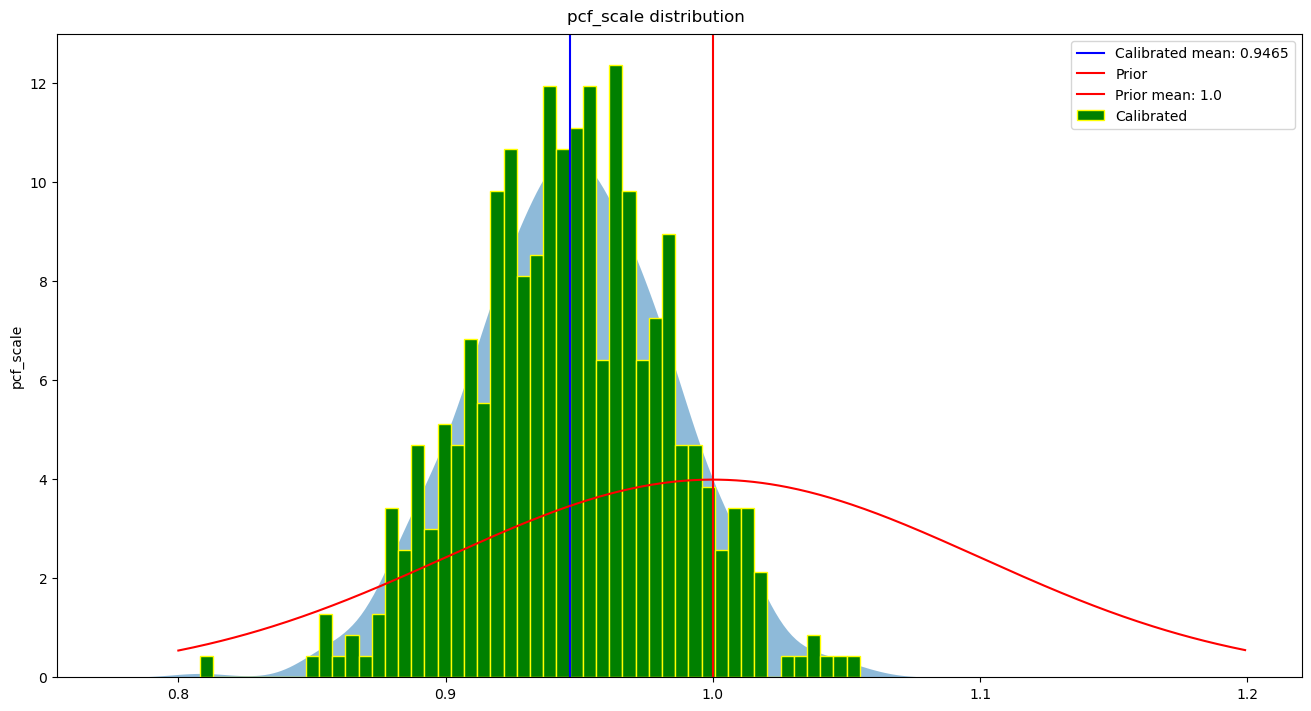

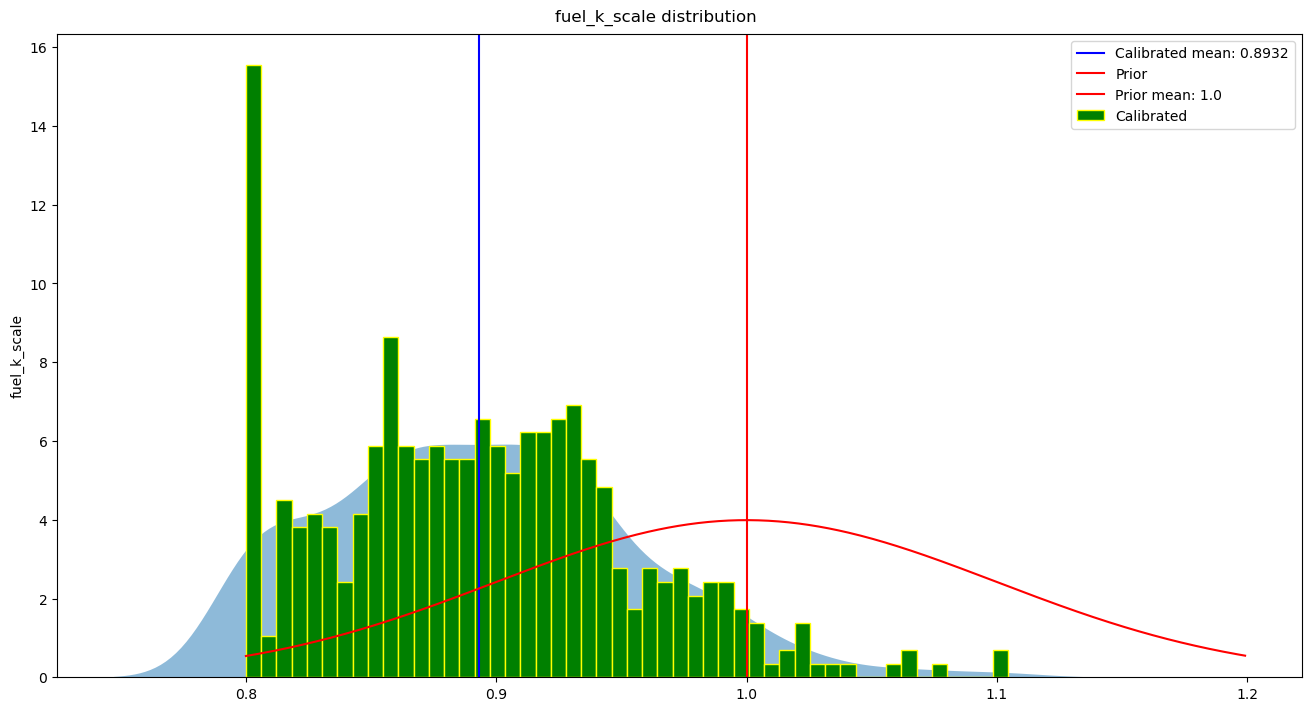

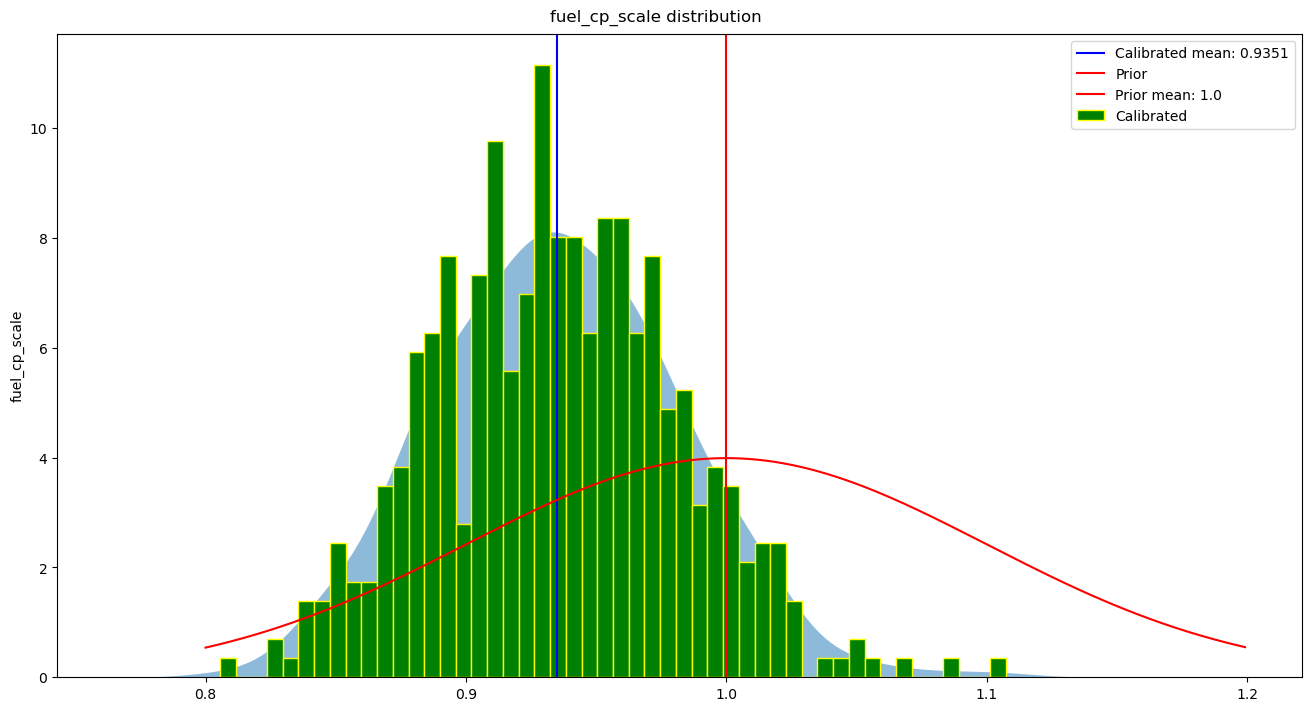

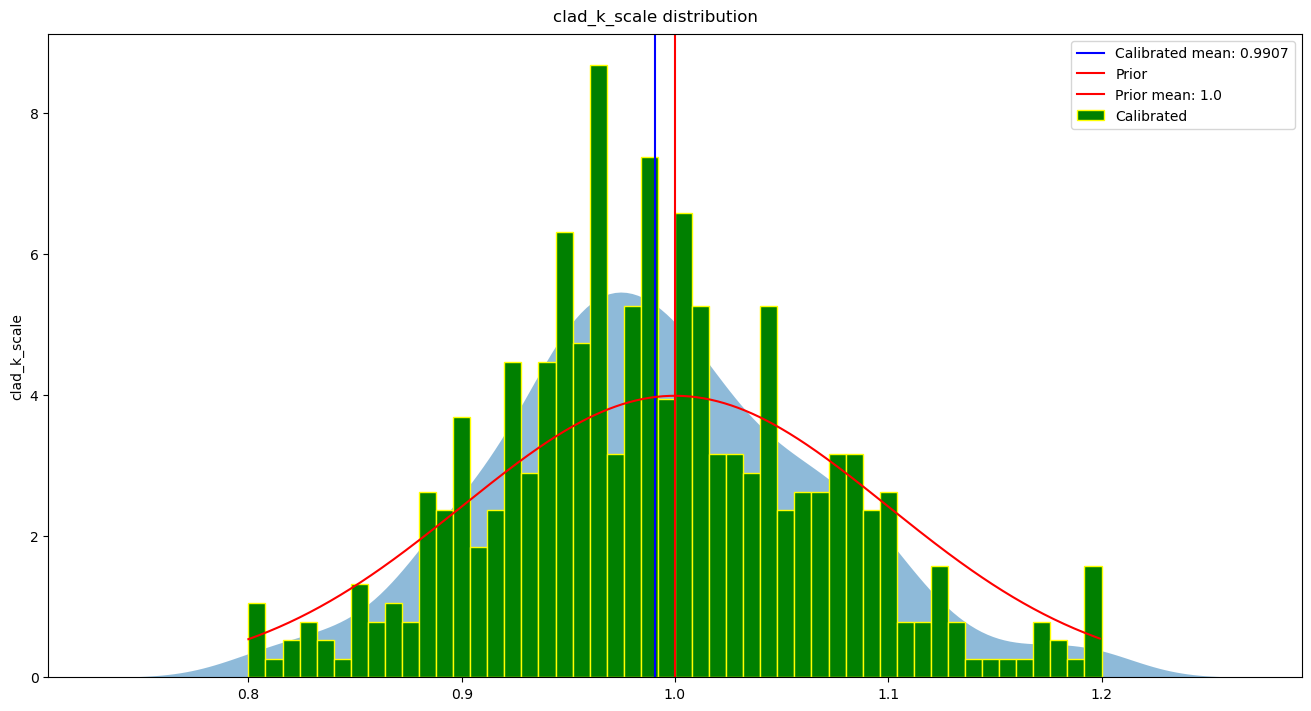

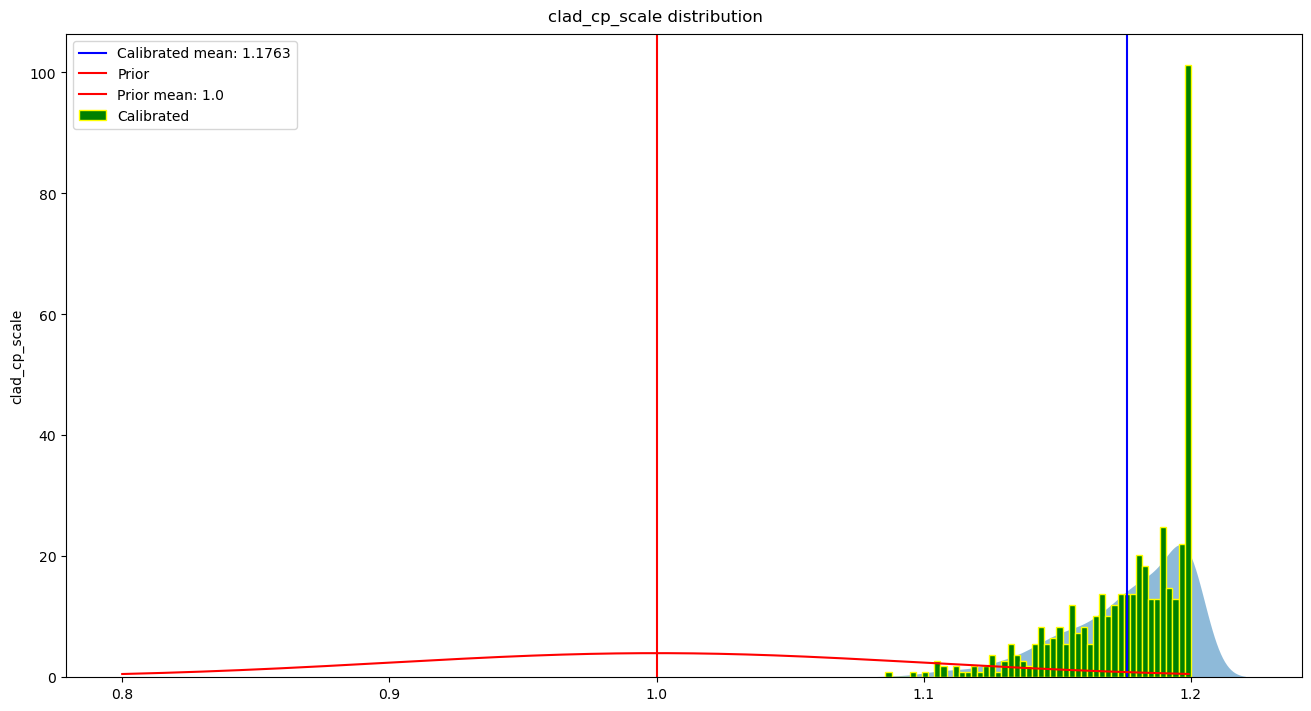

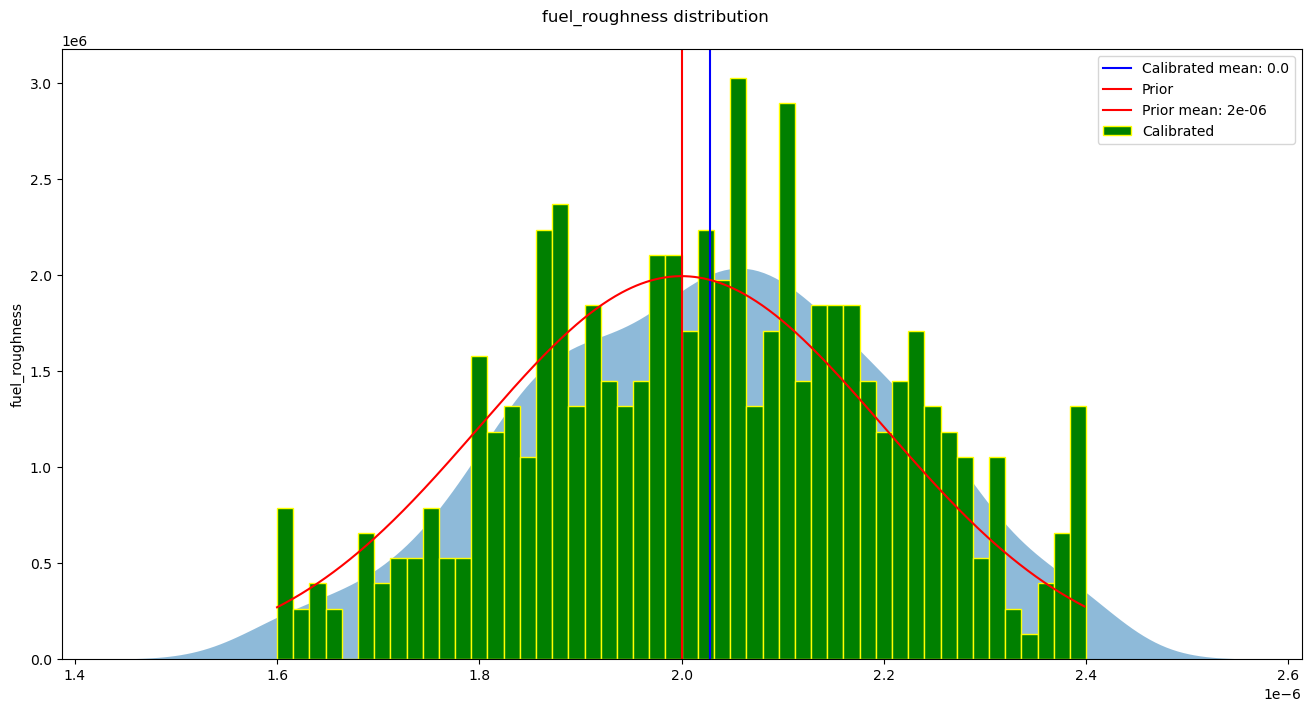

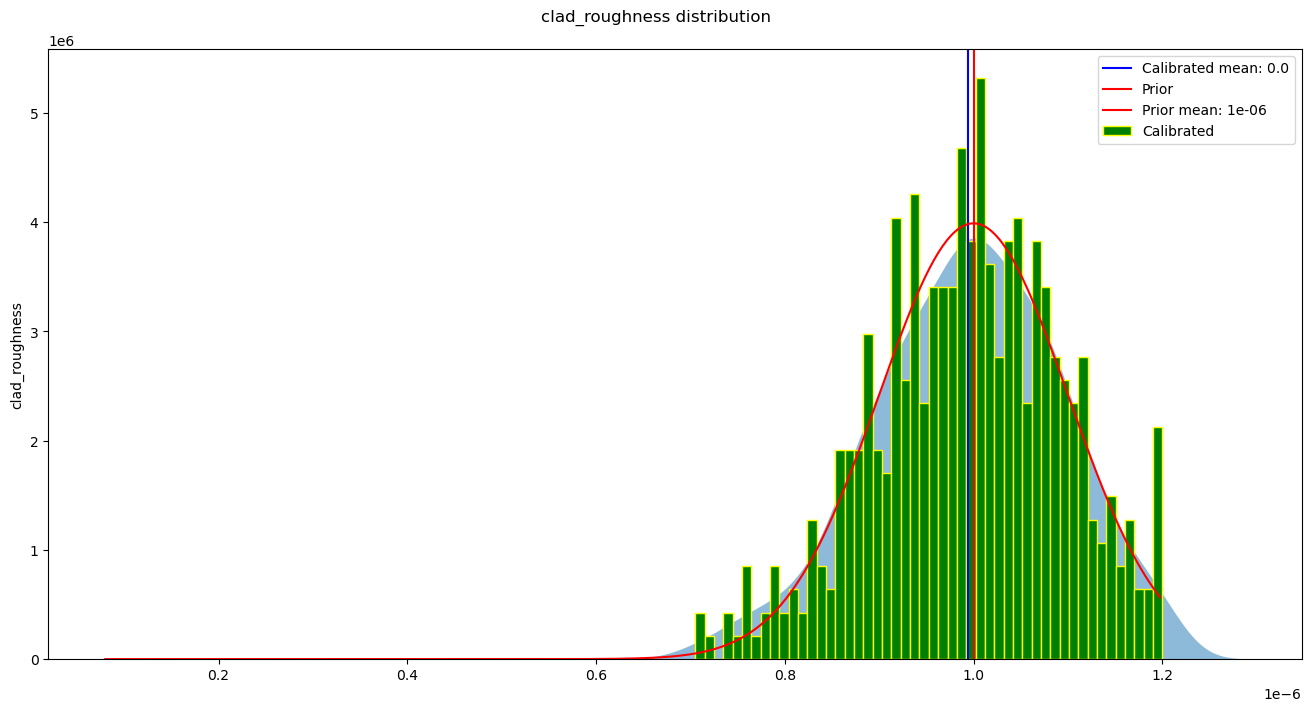

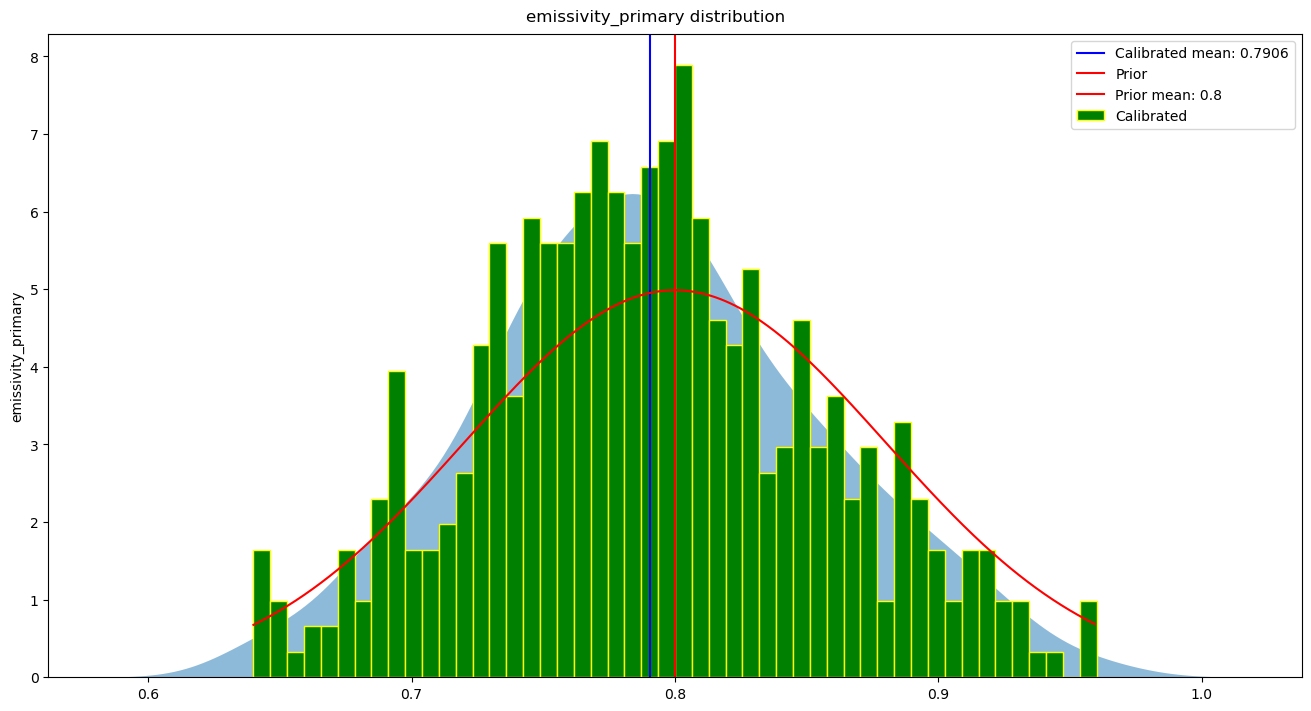

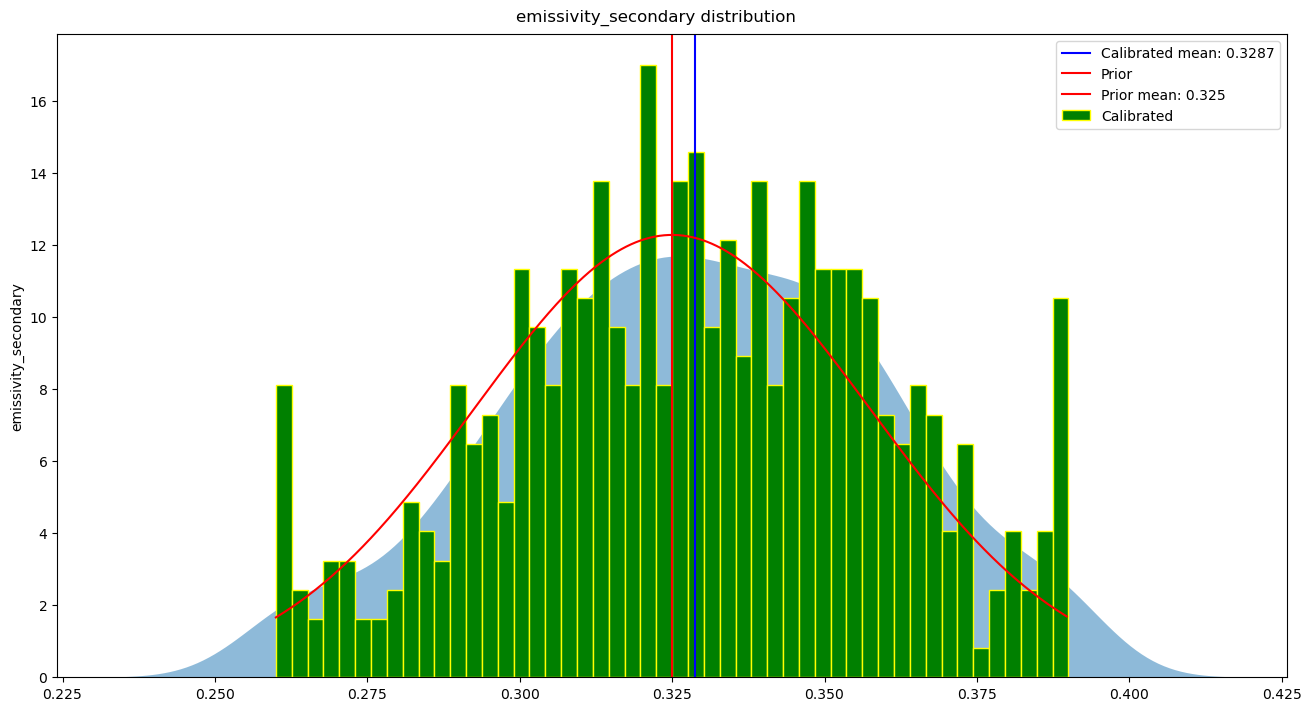

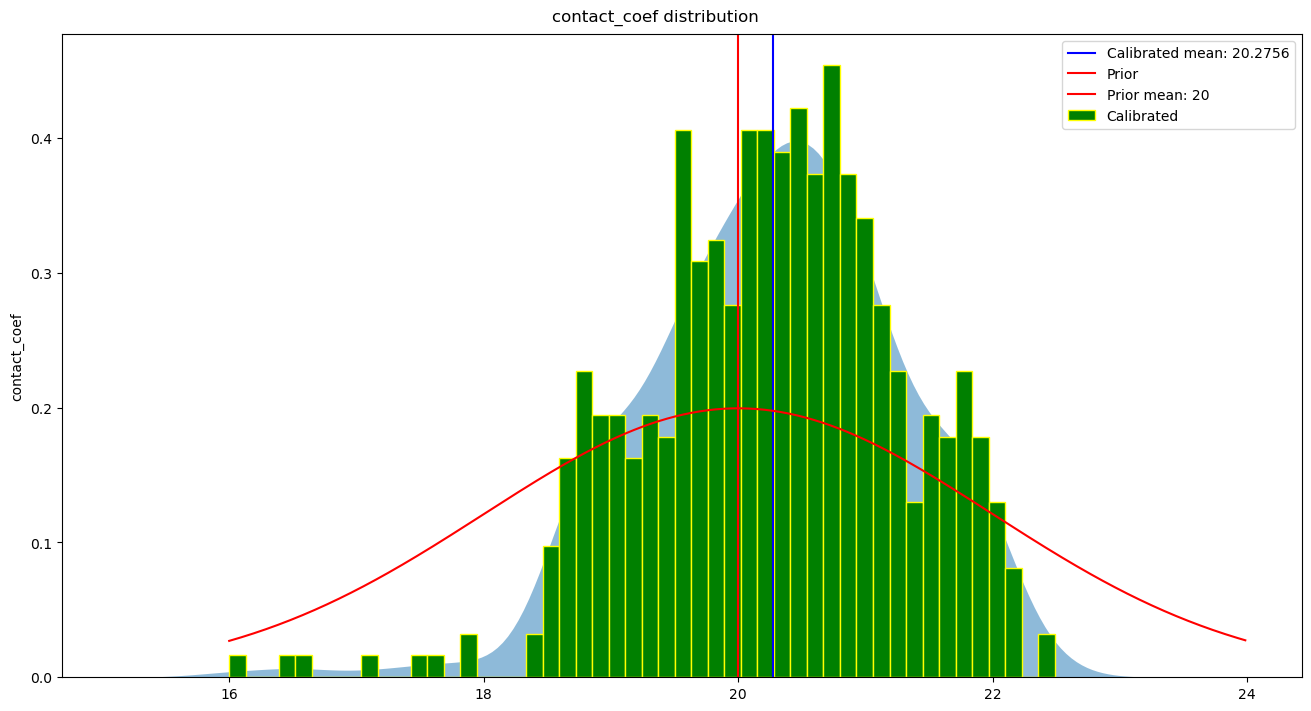

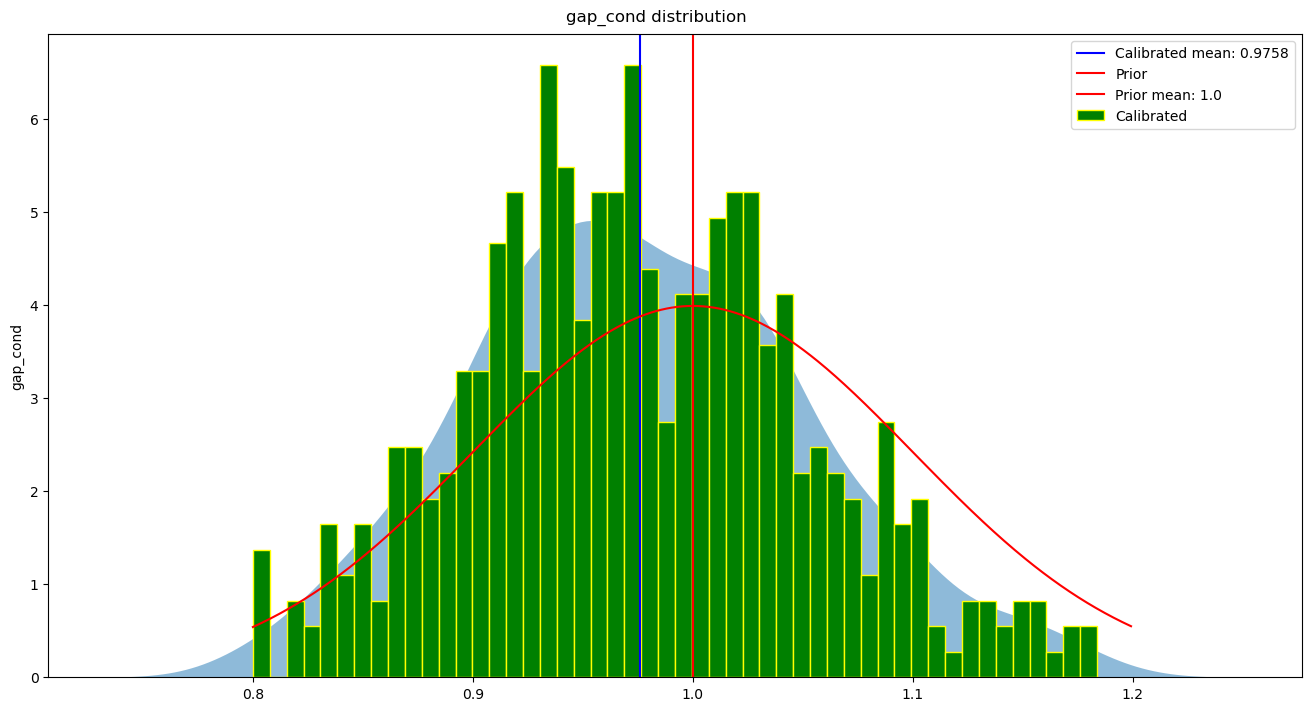

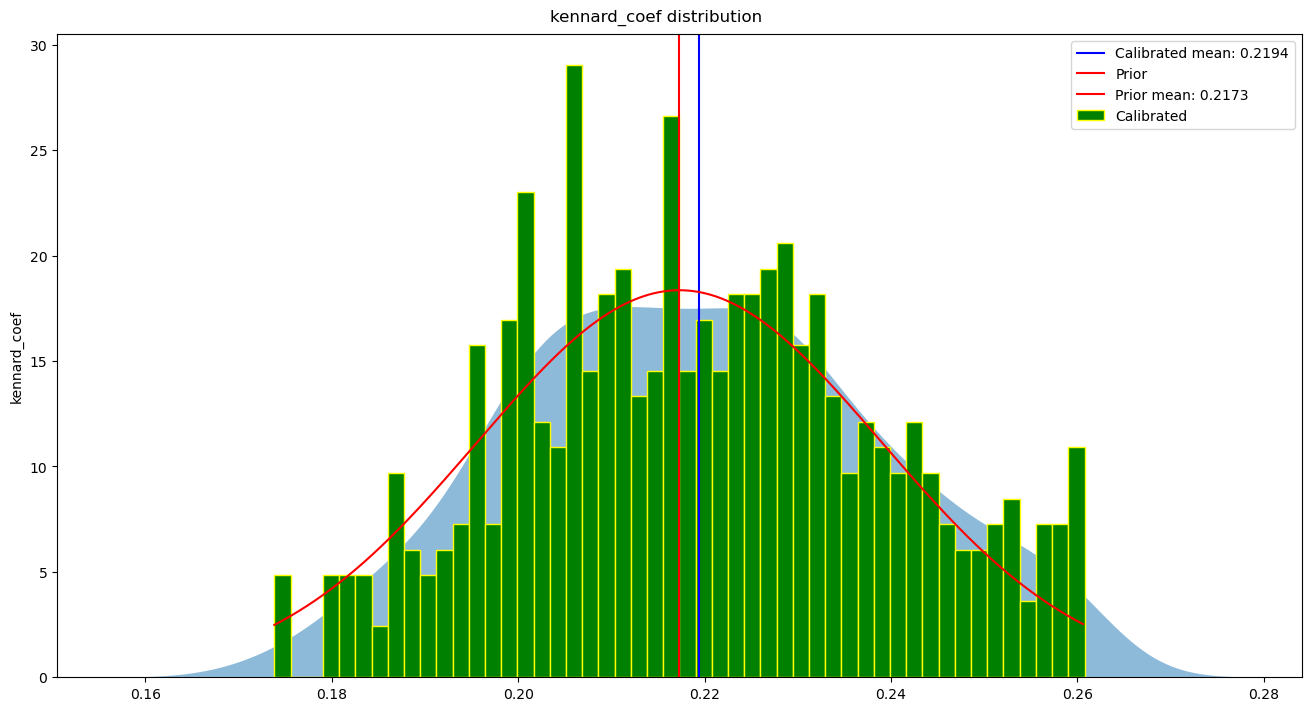

In [12]:
paramNames = ['pcf_scale', 'fuel_k_scale', 'fuel_cp_scale', 'clad_k_scale', 'clad_cp_scale', 
              'fuel_roughness', 'clad_roughness', 'emissivity_primary', 'emissivity_secondary', 
              'contact_coef', 'gap_cond', 'kennard_coef']
distDict ={'pcf_scale':[1.0, 0.1, 0.8, 1.2], 
           'fuel_k_scale':[1.0, 0.1, 0.8, 1.2], 
           'fuel_cp_scale':[1.0, 0.1, 0.8, 1.2],
           'clad_k_scale': [1.0, 0.1, 0.8, 1.2],
           'clad_cp_scale':[1.0, 0.1, 0.8, 1.2],
           'fuel_roughness':[2.0e-6, 2.0e-7, 1.6e-6, 2.4e-6],
           'clad_roughness':[1e-6, 1e-7, 0.8e-7, 1.2e-6],
           'emissivity_primary':[0.8, 0.08, 0.64, 0.96],
           'emissivity_secondary':[0.325, 0.0325, 0.26, 0.39], 
           'contact_coef':[20, 2, 16, 24], 
           'gap_cond':[1.0, 0.1, 0.8, 1.2], 
           'kennard_coef':[0.2173, 0.02173, 0.17384, 0.26076]
          }

for param in paramNames:
    mean, sd, lb, ub = distDict[param]
    d = (ub-lb)/500
    x = np.arange(lb, ub, d)
    y = st.norm.pdf(x, mean, sd)
    # plt.plot(x,y)
    
    plot_data(x, y, mean, df[param].to_numpy(), param)

# st.norm.pdf(x, mean, sd)

In [13]:
calibrated_mean

pcf_scale               9.465263e-01
fuel_k_scale            8.932157e-01
fuel_cp_scale           9.350987e-01
clad_k_scale            9.906738e-01
clad_cp_scale           1.176300e+00
fuel_roughness          2.027666e-06
clad_roughness          9.936777e-07
emissivity_primary      7.905868e-01
emissivity_secondary    3.287448e-01
contact_coef            2.027561e+01
gap_cond                9.758008e-01
kennard_coef            2.193589e-01
dtype: float64

In [14]:
import os
import pickle
reducedSize = 12
cwd = os.getcwd()
ensembleRom = []
for i in range(reducedSize):
    name = os.path.join(cwd, 'gp_'+str(i)+'.pkl')
    with open(name, 'rb') as f:
        ensembleRom.append(pickle.load(f))

/Users/wangc/miniconda3/envs/validation_libs/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


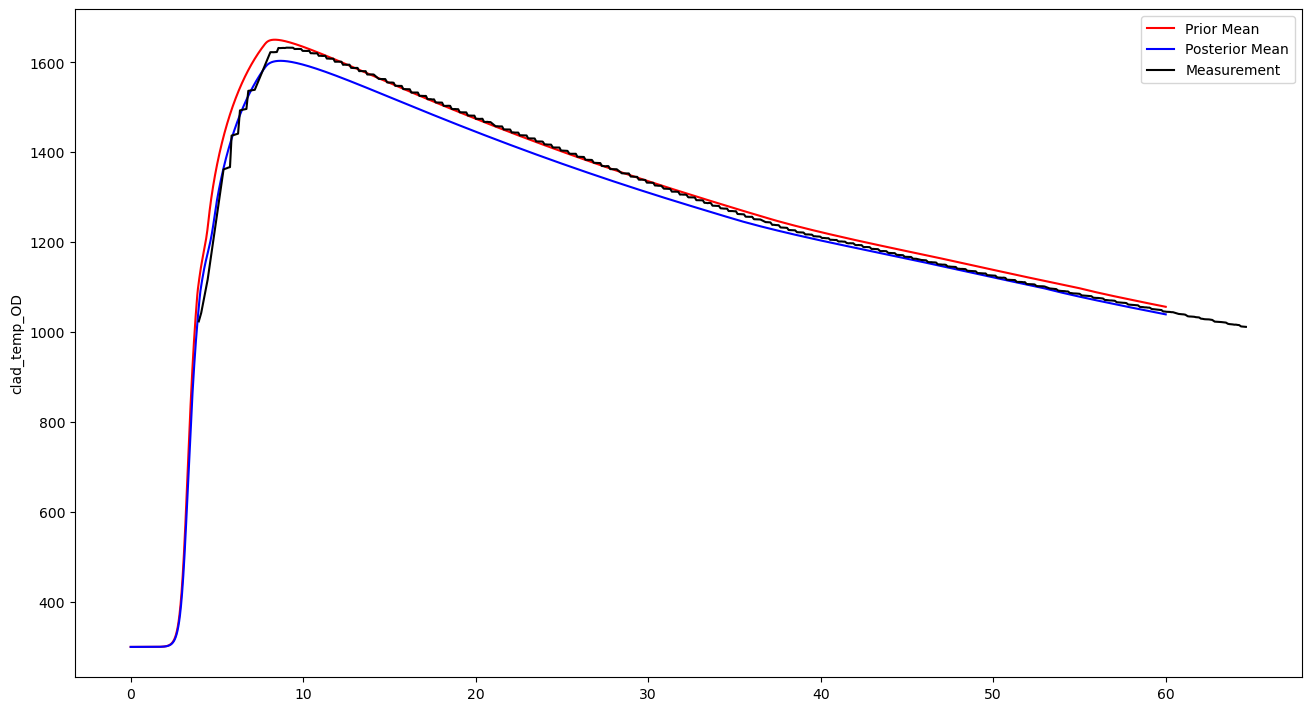

In [20]:
import os
baseFolder = "data"
cwd = os.getcwd()
file_org = os.path.join(cwd, baseFolder, "temp_trace_0.csv")
file_cal = os.path.join(cwd, baseFolder, "temp_trace_1.csv")
file_msr = os.path.join(cwd, baseFolder, "SETH_C_measured_data.csv")

df_org = pd.read_csv(file_org)
df_cal = pd.read_csv(file_cal)

df_msr = pd.read_csv(file_msr,usecols=['time-pyr2[s]','Pyr-2[C]'])
df_msr = df_msr.rename(columns={'time-pyr2[s]':'time','Pyr-2[C]':'clad_temp_OD'})
df_msr = df_msr.dropna(axis='index') # Remove NaN values from end of data file
df_msr['clad_temp_OD'] += 273.15 # Convert pyrometer-2 data from [C] to [K]


fig,ax = plt.subplots(figsize=(13,7),constrained_layout=True)
ax.plot(df_org['time'], df_org['clad_temp_OD'], 'r', label='Prior Mean')
ax.plot(df_cal['time'], df_cal['clad_temp_OD'], 'b', label='Posterior Mean')
ax.plot(df_msr['time'], df_msr['clad_temp_OD'], 'k', label='Measurement')

ax.set_ylabel('clad_temp_OD')
ax.legend()

In [19]:
df_org

,time,fuel_temp_centerline,fuel_temp_surface,clad_temp_ID,clad_temp_OD
0,0.0,299.150000,299.150000,299.150000,299.150000
1,0.1,299.150001,299.150373,299.152245,299.152973
2,0.2,299.150005,299.150892,299.154365,299.155197
3,0.3,299.150017,299.151476,299.156233,299.157131
4,0.4,299.150870,299.152882,299.158042,299.158961
...,...,...,...,...,...
2735,56.0,1139.193791,1101.053866,1089.676902,1088.157236
2736,57.0,1130.521620,1092.559386,1081.203489,1079.694503
2737,58.0,1121.848596,1084.322964,1073.093952,1071.601031
2738,59.0,1113.213480,1076.292844,1065.213992,1063.738864
